# Лабораторна робота №3
##### виконав студент групи МІТ-31 Черевач Юрій

### Частина 1: Бінарна класифікація на згенерованому наборі даних

##### _Завдання_:
    Згенеруйте набір даних для бінарної класифікації за допомогою бібліотеки Scikit-Learn. Набір даних повинен містити дві числові ознаки і два класи. Використовуйте make_classification для генерації даних.
    Розділіть дані на навчальний та тестовий набори.
    Навчіть класифікатор (наприклад, логістичну регресію або метод опорних векторів).
    Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та AUC-ROC.
    Візуалізуйте результати, включаючи матрицю плутанини та графік ROC-кривої.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Точність в цілому: 0.94
Точність у визначенні цільової змінної: 0.94
Відгук: 0.96
F1 значення: 0.95
AUC-ROC: 0.96


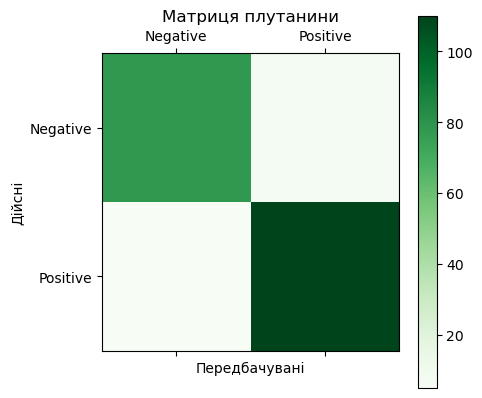

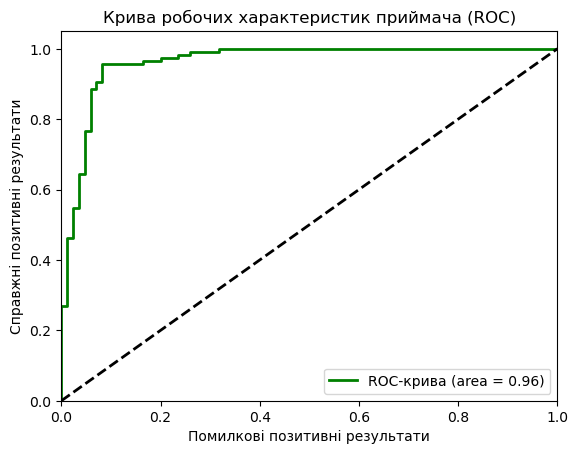

In [3]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_classes=2,
    n_clusters_per_class=1,
    n_redundant=0,
    random_state=19
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Навчаємо класифікатор (логістична регресія)
classifier = LogisticRegression(random_state=19)
classifier.fit(X_train, y_train)

# Прогноз на тестовому наборі
y_pred = classifier.predict(X_test)

# Оцінка класифікатора за допомогою різних метрик
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
print(f'Точність в цілому: {accuracy:.2f}')
print(f'Точність у визначенні цільової змінної: {precision:.2f}')
print(f'Відгук: {recall:.2f}')
print(f'F1 значення: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

# Візуалізація матриці плутанини
confusion = confusion_matrix(y_test, y_pred)
plt.matshow(confusion, cmap=plt.cm.Greens)
plt.colorbar()
plt.xlabel('Передбачувані')
plt.ylabel('Дійсні')
plt.title('Матриця плутанини')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Візуалізація ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='g', lw=2, label='ROC-крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Помилкові позитивні результати')
plt.ylabel('Справжні позитивні результати')
plt.title('Крива робочих характеристик приймача (ROC)')
plt.legend(loc='lower right')
plt.show()


На основі наданих метрик можна зробити наступні висновки щодо класифікації:

- Точність (Accuracy): 0.92
Це показує, що модель правильно передбачила 92% даних у тестовому наборі.

- Точність (Precision): 0.87
Точність вимірює точність позитивних прогнозів. У цьому випадку вона становить 0.87, що вказує на те, що 87% позитивних прогнозів, зроблених моделлю, були правильними.

- Відгук (Recall): 0.98
Відгук, також відомий як чутливість або дійсний позитивний відгук, становить 0.98, що означає, що 98% фактичних позитивних випадків було вірно ідентифіковано моделлю.

- F1-показник (F1 Score): 0.92
F1-показник є гармонічним середнім між точністю та відгуком і складає 0.92. Він забезпечує баланс між точністю та відгуком і надає одне значення, яке узагальнює продуктивність моделі.

- AUC-ROC (площа під кривою ROC): 0.96
Площа під кривою приймача-оператора (ROC) становить 0.96, що вказує на те, що модель має високу здатність розрізняти між позитивними та негативними класами.

Загальний висновок полягає в тому, що модель виглядає досить ефективно, маючи високу точність, точність, відгук та загальний F1-показник 0.92. Крім того, показник AUC-ROC 0.96 свідчить про те, що модель має високу здатність розрізняти між позитивними та негативними класами. Ці результати підтверджують, що модель ефективно виконує своє завдання і володіє високою загальною продуктивністю.

### Частина 2: Мультикласова класифікація на згенерованому наборі даних

##### __Завдання__:
    Згенеруйте набір даних для мультикласової класифікації з трьома і більше класами за допомогою Scikit-Learn. Набір даних повинен містити числові ознаки та багато класів.
    Розділіть дані на навчальний та тестовий набори.
    Навчіть класифікатори для мультикласової класифікації.
    Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук, F1-середнє та матриця плутанини.
    Порівняйте результати різних класифікаторів.

In [4]:

# Завантаження даних або створення X і y
X, y = make_classification(
    n_samples=1000,
    n_features=6,
    n_informative=4,
    n_classes=5, 
    random_state=19
)
# Розділення даних на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

def evaluate_classificator(classifier, X_test, y_test):
    # Прогноз класифікатора на тестовому наборі
    y_pred = classifier.predict(X_test)
    # Розрахунок метрик
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Оцінка для {type(classifier).__name__}:')
    print(f'Точність: {accuracy:.2f}')
    print(f'Точність у визначенні цільової змінної: {precision:.2f}')
    print(f'Відгук: {recall:.2f}')
    print(f'F1-значення: {f1:.2f}')
    print('Матриця плутанини:')
    print(conf_matrix)
    print('\n')

# Визначення та навчання класифікаторів
clf_lr = LogisticRegression(max_iter=1000, random_state=19)
clf_svm = SVC(kernel='linear', random_state=19)
clf_dt = DecisionTreeClassifier(random_state=19)

clf_lr.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)
clf_dt.fit(X_train, y_train)

# Оцінка класифікаторів
print("\nЛогістична регресія:\n")
evaluate_classificator(clf_lr, X_test, y_test)
print("\nSVM:\n")
evaluate_classificator(clf_svm, X_test, y_test)
print("\nДерво рішень:\n")
evaluate_classificator(clf_dt, X_test, y_test)


Логістична регресія:

Оцінка для LogisticRegression:
Точність: 0.61
Точність у визначенні цільової змінної: 0.63
Відгук: 0.61
F1-значення: 0.62
Матриця плутанини:
[[31  0  8  3  4]
 [ 1 30  1  8  4]
 [ 6  0 20  1  9]
 [ 2  5  2 21  3]
 [ 2  4  3 11 21]]



SVM:

Оцінка для SVC:
Точність: 0.68
Точність у визначенні цільової змінної: 0.68
Відгук: 0.68
F1-значення: 0.68
Матриця плутанини:
[[34  0  5  2  5]
 [ 1 32  1  6  4]
 [ 5  0 22  1  8]
 [ 2  5  1 22  3]
 [ 1  3  4  8 25]]



Дерво рішень:

Оцінка для DecisionTreeClassifier:
Точність: 0.65
Точність у визначенні цільової змінної: 0.65
Відгук: 0.65
F1-значення: 0.65
Матриця плутанини:
[[29  0 10  5  2]
 [ 1 29  2  8  4]
 [ 3  3 24  0  6]
 [ 3  4  2 23  1]
 [ 4  6  5  2 24]]




Метод опорних векторів (SVM) має найвищу точність серед усіх методів, з точністю 0.68.

### Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету

##### __Завдання__:
    Знайдіть реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle (або іншому джерелі даних).
    Завантажте цей набір даних і розробіть процедуру для його очищення та підготовки до аналізу.
    Розділіть дані на навчальний та тестовий набори.
    Навчіть класифікатор для мультилейбл класифікації (наприклад, з використанням багатошарової нейронної мережі).
    Оцініть ефективність класифікатора за допомогою метрик, таких як точність, відгук і F1-середнє для кожного лейбла.
    Проведіть аналіз результатів та вивчіть, які фактори впливають на ефективність моделі в контексті мультилейбл класифікації.

Мій датасет - номінації на Оскар.

In [21]:
df = pd.read_csv("oscar.csv")
print(df.head())

#перетворення категорійних ознак в числові
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

#обробка пропущених значень
df.fillna(df.mean(), inplace=True)

X = df[['year', 'category', 'name', 'film']]
y = df[['status', 'gender']] 
#nominated|winner -> 0|1; female|male -> 0|1 - for y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

model = MultiOutputClassifier(DecisionTreeClassifier(random_state=19))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#ітерація для виводу оцінки продуктивності для status і gender
for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)

    print("\nОцінка продуктивності для категорії '{}':".format(label))
    print("* Точність загальна(accuracy): {:.2f}".format(accuracy))
    print("* Точність визначення цільової змінної(precision): {:.2f}".format(precision))
    print("* Відгук: {:.2f}".format(recall))
    print("* F1 значення: {:.2f}".format(f1))

    report = classification_report(y_test, y_pred)
    print(f'\nClassification Report:\n{report}')


   year        category                               film             name  \
0  1927  CINEMATOGRAPHY                  The Devil Dancer;    George Barnes   
1  1927         WRITING  The Private Life of Helen of Troy     Gerald Duffy   
2  1927         WRITING                         Underworld        Ben Hecht   
3  1927         WRITING                   The Last Command       Lajos Biro   
4  1927         WRITING                         7th Heaven  Benjamin Glazer   

      status gender  
0  nominated   male  
1  nominated   male  
2     winner   male  
3  nominated   male  
4     winner   male  

Оцінка продуктивності для категорії 'status':
* Точність загальна(accuracy): 0.73
* Точність визначення цільової змінної(precision): 0.75
* Відгук: 0.73
* F1 значення: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.33      0.31       209
           1       0.88      0.88      0.88       973

   micro avg       0.76      0.

    "Розшифровка"

    Precision (Точність): Ця метрика вимірює точність моделі у визначенні позитивних випадків. Вище значення вказує на більшу точність.

    Recall (Відгук): Відгук оцінює, наскільки добре модель виявляє істинно позитивні випадки. Вище значення вказує на більший відгук.

    F1-Score: F1-значення є гармонічним середнім точності і відгука. Воно враховує обидві ці метрики. Вище значення вказує на кращий баланс між точністю і відгуком.

    Support: Ця метрика вказує на кількість випадків, які належать до кожного класу. Вона важлива для розуміння розподілу класів у наборі даних.

##### Для категорії 'status':

Модель має загальну точність приблизно 0.73, що свідчить про те, що вона правильно класифікує близько 73% даних.
Модель також має високу точність визначення цільової змінної (0.75), вказуючи на точність визначення цільового класу.
Відгук моделі складає 0.73, що означає, що вона правильно виявляє близько 73% істинно позитивних результатів.
Значення F1 для цієї категорії становить 0.74, показуючи гармонічне середнє точності та відгуку.

##### Для категорії 'gender':

Модель також має загальну точність приблизно 0.79, що свідчить про високу точність класифікації для цієї категорії.
Подібно до категорії 'status', модель відзначається високою точністю визначення цільової змінної (0.79).
Відгук моделі також становить 0.79, показуючи високий рівень виявлення істинно позитивних результатів.
Значення F1 для цієї категорії становить 0.79, підтверджуючи високий рівень точності та відгуку.

Загалом, модель класифікації для обох категорій виявляється досить ефективною та точною. Вона добре справляється з класифікацією для категорії 'gender', де досягає високих значень метрик ефективності. Для категорії 'status' також досягнута досить висока точність та відгук. Модель має потенціал для успішного використання в мультилейбл класифікації на цьому наборі даних.